# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Предварительные замечания
1. В процессе подачи тест-объявления на сайте [Яндекс.Недвидимости](https://realty.ya.ru/management-new/add/) было выявлено, что для подачи объявления необходимы:
- регистрация аккаунта
- адрес
- 4 фотографии<br><br>
Остальные параметры не обязательны к заполнению при оформлении объявления о продаже и могут быть не указаны.

2. Под кол-вом этажей в столбце `floors_total` подразумевается этажность, т.е. число надземных этажей, а не общее число этажей, которое учитывает ЕГРН.

# Не забыть!!!
не забыть заменить переменную на data в 2.1.2.3

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импорт библиотек, которые будем использовать
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Открываем файл и записываем его в перенную data
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
# Будем отображать все колонки
pd.set_option('display.max_columns', None)

#### Ознакомление с датафреймом:

In [3]:
display(data.head(20))
f'Количество строк - {data.shape[0]}, кол-во столбцов - {data.shape[1]}.'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


'Количество строк - 23699, кол-во столбцов - 22.'

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.describe(include=["object", "bool"])

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


#### Информация о типах данных в датафрейме:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Общая гистограмма для всех числовых столбцов.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

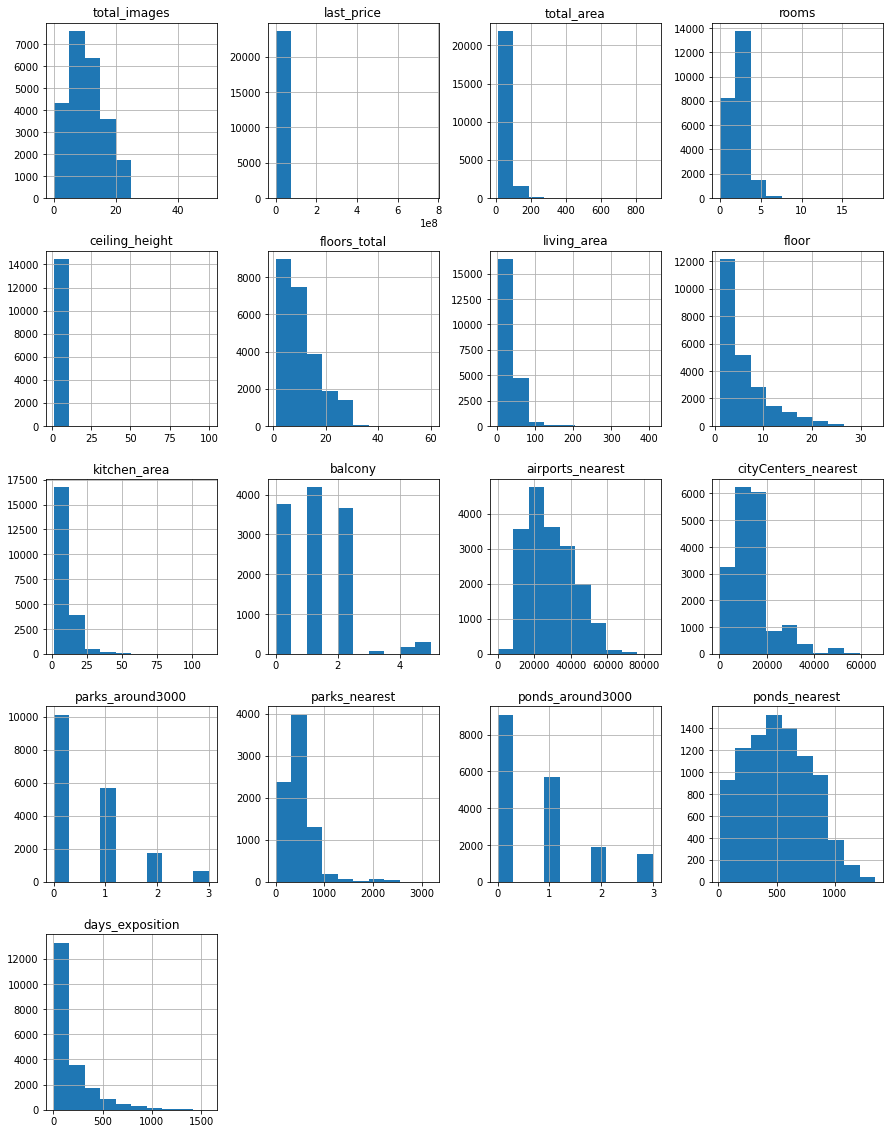

In [7]:
data.hist(figsize=(15, 20))

#### Описание столбцов для справки:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

#### Предварительные выводы по составу датафрейма:
- большое кол-во пропусков
- наличие аномальных значений, например, высота потолков - 100м и 1м
- неверные типы данных, например,
   - `is_apartment` - `object`, должен быть `bool`
   - `parks_around`, `ponds_around`, `days_exposition`, - `float64`, должны быть `int64`
- некорректные названия столбцов

### Предобработка данных

#### Анализ пропусков.

##### Пропуски по столбцам.

In [8]:
# Выводим долю пропущенных записей от общего кол-ва записей по столбцам в процентах и 
# кол-во пропущенных записей по столбцам:
data_missing_total = pd.DataFrame({'Доля пропусков по столбцу': 
                                   (round(data.isna().sum() / len(data), 4).map('{:.2%}'.format)), 
                                   'Кол-во пропусков по столбцу': data.isna().sum()})
data_missing_total.sort_values(by='Кол-во пропусков по столбцу', ascending=False)

,Доля пропусков по столбцу,Кол-во пропусков по столбцу
is_apartment,88.29%,20924
parks_nearest,65.91%,15620
ponds_nearest,61.56%,14589
balcony,48.61%,11519
ceiling_height,38.80%,9195
airports_nearest,23.38%,5542
cityCenters_nearest,23.29%,5519
ponds_around3000,23.28%,5518
parks_around3000,23.28%,5518
days_exposition,13.42%,3181


##### Пропуски в столбце - "высота потолков" `ceiling_height`

In [9]:
f'Процент пропусков от общего кол-ва записей: {round(data["ceiling_height"].isna().sum() / len(data["ceiling_height"]), 4):.2%}'

'Процент пропусков от общего кол-ва записей: 38.80%'

###### Гипотезы:
**Причины появления пропусков:**
- желание продавцов скрыть непривлекательные значения до последнего, тем самым привлечь максимальное кол-во потенциальных покупателей
- предположение продавца, что высоты потолков в типовых домах известны покупателям (пример: высота потолков в "хрущевках" - 2.5м)
- необязательность указания этажа при подаче объявления
- ошибки в заполнении / передаче данных

**Заполнение пропусков:**<br>
- Значения высот потолков можно было бы заменить на средние или медианные в типовых домах[<sup>1</sup>](#fn1) массовой застройки, если такие дома составляют большу́ю часть датафрейма. <br>
- Значения высот потолков в нетиповых домах могут быть крайне не характерны для остальных данных. Оставим их без изменений.

###### Анализ:
Для оценки целесообразности замены пропущенных значений для типовых домов:
1. проверим распределение пропущенных значений по этажности домов: если пропусков по типовым этажностям достаточно много, замена пропусков будет эффективной
2. проверим распределение заполненных значений по каждой из типовых этажностей: если в заполненных значениях большой процент типовых высот, замена пропусков типовыми значениями не исказит распределение
<br><br><br>
<sup>1</sup><span id="fn1"> Справка по типовым домам массовой застройки ([источник](https://www.bn.ru/sprav_dom.phtml "www.bn.ru")):
- 5 этажей, высота потолков 2.5м
- 9 этажей, высота потолков 2.5м / 2.64м
- 10 этажей, высота потолков 2.5м / 2.64м
- 12 этажей, высота потолков 2.5м / 2.64м
- 16 этажей, выотса потолков 2.5м / 2.64м / 2.7м </span><br>

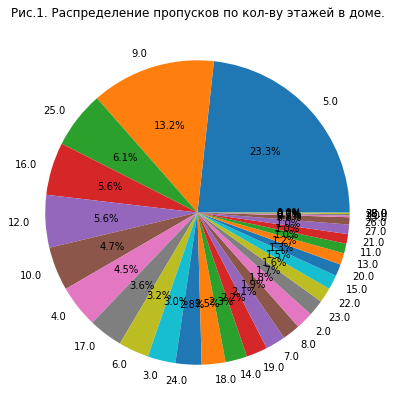

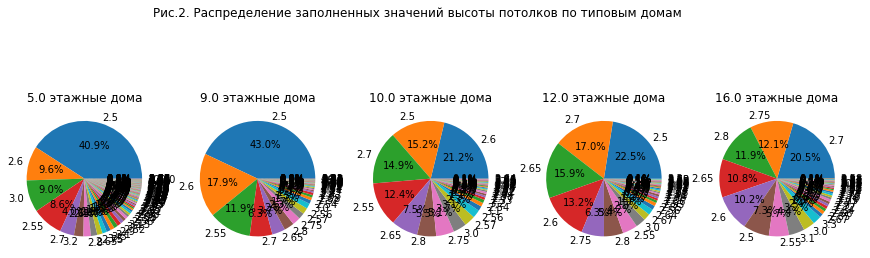

,Средняя высота потолков,Медианная высота потолков,Типовые высоты
Этажей в доме,,,
5.0,2.793191,2.55,2.5
9.0,2.599093,2.55,2.5 или 2.64
10.0,2.685200,2.60,2.5 или 2.64
12.0,2.640258,2.65,2.5 или 2.64
16.0,2.747503,2.70,2.5 или 2.64м или 2.7м


In [10]:
# Отобразим процент пропусков по кол-ву этажей в доме
data.query('ceiling_height.isna()')['floors_total'].value_counts().plot(kind='pie', 
                                                                        figsize=(7, 7), 
                                                                        autopct='%1.1f%%', 
                                                                        title='Рис.1. Распределение пропусков по кол-ву этажей в доме.', 
                                                                        label='')
plt.show()

# Смотрим распределение заполненных значений высот потолков в типовых домах
## Список кол-ва этажей в типовых домах
mass_floors = [5.0, 9.0, 10.0, 12.0, 16.0]
i = 0
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle('Рис.2. Распределение заполненных значений высоты потолков по типовым домам');
for floor_per_ceiling in mass_floors:
    heights = data.query('floors_total == @floor_per_ceiling')['ceiling_height'].value_counts()
    ax[i].pie(heights, autopct='%1.1f%%', labels=heights.index)
    ax[i].set_title(f'{floor_per_ceiling} этажные дома')   
    i += 1
plt.show()

# Выведем среднюю и медианную высоты по этажности
data_floors_pivoted = data.query('floors_total in @mass_floors').pivot_table(index='floors_total',
                                                                             values='ceiling_height',
                                                                             aggfunc=['mean', 'median'])
# Создаем столбец с типовыми высотами
reference_ceiling = {'Типовые высоты': ['2.5', '2.5 или 2.64', '2.5 или 2.64', '2.5 или 2.64', '2.5 или 2.64м или 2.7м']}
reference_data = pd.DataFrame(data=reference_ceiling, index=mass_floors)

# Заменяем названия столбцов для наглядности
data_floors_pivoted.columns = ['Средняя высота потолков', 'Медианная высота потолков']
data_floors_pivoted.index.rename('Этажей в доме', inplace=True)

#Объединяем столбцы с высотами
data_floors_pivoted.join(reference_data)

###### Выводы:
1. Рис.1 показывает, что замена пропусков будет эффективной, т.к. доля пропусков в домах с кол-вом этажей, соответствующим типовым, больше 40% от общего кол-ва пропусков высот потолков:
- 23% в 5 этажных
- 13% в 9 этажных
- 6% в 12 этажных<br>
2. Проанализировав Рис. 2, можно сказать, что почти половина заполненных значений высот потолков для каждой этажности соответствует типовой, что означает наличие большого кол-ва типовых домов в данных.
3. Медианные высоты потолков по соответствующим этажностям находятся в пределах характерных типовых значений, что позволяет заменить пропуски без искажения данных.<br>
**Итог:** Заменим пропуски высот потолков в типовых домах с 5, 9, 10, 12, 16 этажами на соответствующие медианные значения и проверим результат.

In [11]:
display(f'Пропусков до замены: {data.query("floors_total in @mass_floors")["ceiling_height"].isna().sum()}')
filled_ceiling_height = data.copy()
# Замена пропусков высот потолков в типовых домах с 5, 9, 10, 12, 16 этажами
for floor_to_replace in mass_floors:
    filled_ceiling_height.loc[(filled_ceiling_height['floors_total'] == floor_to_replace) & (filled_ceiling_height['ceiling_height'].isna()), 'ceiling_height'] = \
    filled_ceiling_height.loc[(filled_ceiling_height['floors_total'] == floor_to_replace), 'ceiling_height'].median()
# Проверка наличия пропусков высот потолков в типовых домах
f'Пропусков после замены: {filled_ceiling_height.query("floors_total in @mass_floors")["ceiling_height"].isna().sum()}'

'Пропусков до замены: 4770'

'Пропусков после замены: 0'

##### Пропуски в столбце - "общая этажность" `floors_total`

In [12]:
f'Процент пропусков от общего кол-ва записей: {round(data["floors_total"].isna().sum() / len(data["floors_total"]), 4):.2%}'

'Процент пропусков от общего кол-ва записей: 0.36%'

**Причины появления пропусков:**
- необязательность указания этажа при подаче объявления
- ошибки в заполнении / передаче данных

**Заполнение пропусков:**<br>
- Так как доля пропущенных значений невысока (0.35%) и предположить или вычислить пропуски проблематично, оставим пропуски без зизменений.

##### Пропуски в столбцах - "жилая площадь" `living_area` и "площадь кухни" `kitchen area`

In [13]:
display(f'Процент пропусков жилой площади: {round(data["living_area"].isna().sum() / len(data["living_area"]), 4):.2%}. \
Кол-во пропусков жилой площади: {data["living_area"].isna().sum()}.')

display(f'Процент пропусков площади кухни: {round(data["kitchen_area"].isna().sum() / len(data["kitchen_area"]), 4):.2%}. \
Кол-во пропусков площади кухни: {data["kitchen_area"].isna().sum()}.')

ratio_kitchen_missing = data.query("studio == True or open_plan == True and ~(kitchen_area.isna())")
display(f'Процент пропусков площади в студиях и квартирах со свободной планировкой от общего числа записей в столбце:\
{round(ratio_kitchen_missing["kitchen_area"].isna().sum() / len(data["kitchen_area"]), 4):.2%}.')

'Процент пропусков жилой площади: 8.03%. Кол-во пропусков жилой площади: 1903.'

'Процент пропусков площади кухни: 9.61%. Кол-во пропусков площади кухни: 2278.'

'Процент пропусков площади в студиях и квартирах со свободной планировкой от общего числа записей в столбце:0.63%.'

###### Гипотезы:
**Причины появления пропусков:**
- предположение продавца, что 
 - жилая площадь не так важна как общая
 - не так отражает заявленную цену
 - общей площади достаточно для оценки привлекательности квартиры
- необязательность указания жилой площади и площади кухни при подаче объявления
- ошибки в заполнении / передаче данных
- возможно, жилая площадь и площадь кухни не указана в квартирах-студиях (столбец `studio`) или квартирах со свободной планировкой (столбец `open_plan`)

**Заполнение пропусков:**<br>
- жилая площадь может быть расчитана как разница общей и жилой или нежилой площадей, не включая балконы и лоджии, но т.к. данные о нежилой площади (подсобные помещения, гардеробные, коридоры, ванные комнаты) не включены в датафрейм, рассчитать значения не представляется возможным
- также будет неверным заполнение значений медианными или средними по категориям, т.к. планировки могут разительно отличаться
- гипотеза о пропусках в значениях жилой площади и площади кухни в квартирах-студиях или квартирах со свободной планировкой требует проверки

###### Анализ
Проверим гипотезу о пропусках значениях жилой площади от обратного: если в данных есть квартиры-студии с заполненными значениями общей и жилой площадей, говорить о том, что все пропуски жилой площади относятся к квартирам-студиям нельзя. Для проверки выведем два среза датафрейма с условиями:
- квартира - студия или  с открытой планировкой
- и указаны
 - и общая и жилая площади 
 - указана площадь кухни

In [14]:
# Проверим есть ли строки с заполненными значениями общих и жилых площадей для квартир-студий
display(f'Кол-во записей для квартир-студий с заполненными значениями общих и жилых площадей: \
{len(data.query("~(living_area.isna()) and studio == True and ~(total_area.isna())"))}')

# Проверим есть ли строки с заполненными значениями общих и жилых площадей для квартир с открытой планировкой
display(f'Кол-во записей для квартир с открытой планировкой с заполненными значениями общих и жилых площадей: \
{len(data.query("~(living_area.isna()) and open_plan == True and ~(total_area.isna())"))}')


# Проверим, есть ли заполненные значения площадей кухни для квартир-студий 
display(f'Кол-во заполненных значений площадей кухонь в квартирах-студиях:\
{len(data.query("studio == True and ~(kitchen_area.isna())"))}')

# Проверим, есть ли заполненные значения площадей кухни для квартир с открытой планировкой
display(f'Кол-во заполненных значений площадей кухонь в квартирах с открытой планировкой:\
{len(data.query("open_plan == True and ~(kitchen_area.isna())"))}')

'Кол-во записей для квартир-студий с заполненными значениями общих и жилых площадей: 139'

'Кол-во записей для квартир с открытой планировкой с заполненными значениями общих и жилых площадей: 62'

'Кол-во заполненных значений площадей кухонь в квартирах-студиях:0'

'Кол-во заполненных значений площадей кухонь в квартирах с открытой планировкой:0'

###### Выводы:
1. Т.к. в данных есть квартиры с указанными общей и жилой площадями как для квартир-студий так и для квартир с открытой планировкой, гипотеза о пропусках для данных категорий не подтвердилась. Замена пропусков другими способами будет некорректной, а удаление записей может привести к искажению данных, поэтому оставими значения пустыми.
2. Для данных по площадям кухонь гипотеза подтвердилась: во всех даных по квартирам-студиям и квартирам с общей планировкой нет площадей кухонь, что позволяет заменять пропущенные значения в этих строках. Но, так как таких пропусков очень мало по сравнению с общим кол-вом записей в столбце `kitchen_area` (0.63%), заменять только их - нецелесообразно, а для замены всех оставшихся, - данных недостаточно. 
**Общий вывод** Оставим пропуски в столбцах "жилая площадь" `living_area` и "площадь кухни" `kitchen area` без изменений.

##### Пропуски в столбце - "апартаменты" `is_apartment`.

In [15]:
display(f'Процент пропусков в столбце "Апартаменты": {round(data["is_apartment"].isna().sum() / len(data["is_apartment"]), 4):.2%}')

'Процент пропусков в столбце "Апартаменты": 88.29%'

**Причины появления пропусков:**
- необязательность указания вида недвижимости при подаче объявления
- возможно, часть объявлений приходится на период, в котором нельзя было выбрать "Статус" объекта
- ошибки в заполнении / передаче данных

**Заполнение пропусков:**<br>
- Вероятно, большое кол-во пропусков относится к помещениям, не являющимся апартаментами, но, так как точно определить значения пропусков невозможно и параметр не участвует в исследовании оставим пропуски без изменений.

##### Пропуски в столбце - "кол-во балконов" `balcony`.

In [16]:
f'Процент пропусков от общего кол-ва записей: {round(data["kitchen_area"].isna().sum() / len(data["kitchen_area"]), 4):.2%}'

'Процент пропусков от общего кол-ва записей: 9.61%'

**Причины появления пропусков:**
- отсутвие балкона
- необязательность указания наличия и кол-ва балконов при подаче объявления
- ошибки в заполнении / передаче данных

**Заполнение пропусков:**<br>
- Скорее всего, большое кол-во пропусков относится к квартирам без балконов, поэтому заменим площадь на `0`.

In [17]:
# Заменим значения пропусков на 0.
data['balcony'].fillna(0, inplace=True)
# Проверим кол-во пропусков после замены.
f'Пропусков после замены: {data["balcony"].isna().sum()}'

'Пропусков после замены: 0'

##### Пропуски в столбцах "Название населенного пункта" `locality_name`, "Ближайший аэропорт" `airport_nearest`,"Расстояние до центра города" `cityCenters_nearest`  оставим без изменений, т.к. предположить значения без дополнительных данных и/или сторонних API невозможно.

##### Пропуски в столбцах - `parks_around3000` и `ponds_around3000`
("число парков в радиусе 3 км." и "число прудов в радиусе 3 км.", соответственно).

**Причины появления пропусков:**
- отсутствие парков или прудов в радиусе 3км.

**Заполнение пропусков:**<br>
- Так как в столбце указаны кол-ва, а пропуски означают отсутствие, заменим все пропуски на `0`.

In [18]:
# Замена пропусков на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# Проверка отсутствия пропусков
display(f'Пропусков в "Парках" после замены: {data["parks_around3000"].isna().sum()}')
display(f'Пропусков в "Водоёмах" после замены: {data["ponds_around3000"].isna().sum()}')

'Пропусков в "Парках" после замены: 0'

'Пропусков в "Водоёмах" после замены: 0'

##### Пропуски в столбцах -  `parks_nearest` и `ponds_nearest`
("расстояние до ближайшего парка" и "расстояние до ближайшего водоёма", соответственно).

In [19]:
display(f'Процент пропусков по "Паркам": {round(data["parks_nearest"].isna().sum() / len(data["parks_nearest"]), 4):.2%}')
f'Процент пропусков по "Водоёмам": {round(data["parks_nearest"].isna().sum() / len(data["parks_nearest"]), 4):.2%}'

'Процент пропусков по "Паркам": 65.91%'

'Процент пропусков по "Водоёмам": 65.91%'

###### Гипотеза:
**Причины появления пропусков:**
- система не заполняла[<sup>2</sup>](#fn2) значения при отсутствии парков или водоёмов в радиусе 3км
- системе не удалось автоматически определить местонахождение объекта

**Заполнение пропусков:**<br>
- Оставим пропуски без изменений, т.к столбец уже несёт всю необходимую информацию. <br><br>

<sup>2</sup><span id="fn1"> Проверим гипотезу о пропуске значений по критерию удаленности на более чем 3км, сравнив пропуски в соответствующих столбцах наличия и расстояния до парков и водоёмов.</span><br>
Так же, проверим предположение о пропуске значений, местонахождение для которых не было найдено.

In [20]:
# Проверка соответствия кол-ва пропусков расстояния до ближ. водоёма кол-ву пропусков
# числа водоёмов в радиусе 3км.
display(f'Несоответствий пропусков в двух столбцах "Водоёмы":\
        {data.loc[data["ponds_around3000"] == 0, "ponds_around3000"].count() - data["ponds_nearest"].isna().sum()}')

# Проверка соответствия кол-ва пропусков расстояния до ближ. парка кол-ву пропусков
# числа парков в радиусе 3км.
display(f'Несоответствий пропусков в двух столбцах "Парки":\
        {data.loc[data["parks_around3000"] == 0, "parks_around3000"].count() - data["parks_nearest"].isna().sum()}')

# Проверка расстояний до парков с незаполненным числом парков
display('Расстояния до парков с незаполненным числом парков:', data.query('parks_around3000 == 0 and ~(parks_nearest.isna())')['parks_nearest'])

# Проверка определения системой адреса объекта
data.query('locality_name.isna() and parks_nearest.isna() and ponds_nearest.isna()')

'Несоответствий пропусков в двух столбцах "Водоёмы":        0'

'Несоответствий пропусков в двух столбцах "Парки":        4'

'Расстояния до парков с незаполненным числом парков:'

1590     3064.0
10959    3190.0
19208    3013.0
19430    3190.0
Name: parks_nearest, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,34.0
7114,5,4250000.0,56.0,2016-03-16T00:00:00,3,NaN,5.0,40.0,4,NaN,False,False,6.0,0.0,NaN,14031.0,8582.0,0.0,NaN,0.0,NaN,96.0
7600,8,6800000.0,70.0,2016-01-31T00:00:00,3,NaN,11.0,42.0,9,NaN,False,False,11.0,1.0,NaN,37123.0,12332.0,0.0,NaN,0.0,NaN,209.0
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,NaN,NaN,68.1,4,NaN,False,False,16.7,0.0,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
12879,12,4400000.0,39.2,2016-04-26T00:00:00,1,NaN,12.0,20.0,12,False,False,False,7.9,0.0,NaN,37123.0,12332.0,0.0,NaN,0.0,NaN,179.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,False,False,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,False,False,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,213.0
18526,3,10800000.0,86.0,2016-06-24T00:00:00,4,3.20,7.0,48.0,2,NaN,False,False,12.0,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,65.0
20057,13,11500000.0,102.0,2015-10-14T00:00:00,2,NaN,5.0,70.0,2,NaN,False,False,NaN,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,325.0


###### Вывод:
Первая гипотеза почти подтвердилась: система заполнила расстояния до четырех парков, оказавшиеся чуть больше (макс. - 190м) критерия удаленности на 3км.. Оставим эти значения без изменений, т.к. они не аномальны и не исказят результатов исследований.<br><br>
Вторая гипотеза опровергнута: некоторым пропускам в названии населенных пунктов, числе прудов и парков, соответствуют заполненные значения расстояния до аэропортов и центров города.

##### Пропуски в столбце "Время показа объявления в днях" `days_exposition`.

In [21]:
f'Процент пропусков от общего кол-ва записей: {round(data["days_exposition"].isna().sum() / len(data["days_exposition"]), 4):.2%}'

'Процент пропусков от общего кол-ва записей: 13.42%'

**Причины появления пропусков:**
- обьекты не были проданы за весь рассматриваемый период
- объекты были проданы, но объявления не были сняты

**Заполнение пропусков:**<br>
- Оставим пропуски без изменений и исключим из анализа объявления не снятые с публикации и без даты продажи. <br><br>

#### Анализ типов данных

##### Типы данных в столбцах

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [23]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


##### Преобразование типов данных и переименование столбцов

###### Переименование столбцов

In [24]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

###### Преобразование типов

Преобразуем типы данных в столбцах без пропусков (в столбцах с пропусками перед преобразованием нужно заменять/удалять пропуски или вводить условные обозначения, что усложнило бы работу).

# Проверка last
columns_to_check = ['last_price', 'floors_total', 
                    'balcony', 'airports_nearest', 
                    'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 
                    'ponds_around_3000', 'ponds_nearest', 'days_exposition']


In [25]:
#Проверка Last_price
last_price_check = data['last_price'] == data['last_price'].astype(int)
last_price_delta = last_price_check.sum() - data["last_price"].count()

if last_price_delta == 0:
    data['last_price'] = data['last_price'].astype(int)

display(f'Кол-во дробных значений: {last_price_delta}')
f'Новый тип данных: {data["last_price"].dtype}'

'Кол-во дробных значений: 0'

'Новый тип данных: int64'

почему

#### Анализ дубликатов

##### Проверка данных на явные дубликаты.

In [26]:
data.duplicated().sum()

0

##### Проверка данных на неявные дубликаты

#### Проверка на аномальные значения

### Посчитайте и добавьте в таблицу новые столбцы

### Проведите исследовательский анализ данных

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод